In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

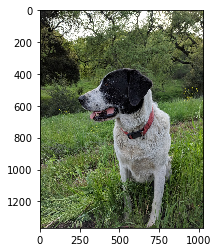

In [2]:
full_img= cv2.imread("../DATA/sammy.jpg")
full_img=cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)
full=full_img.copy()
plt.imshow(full)

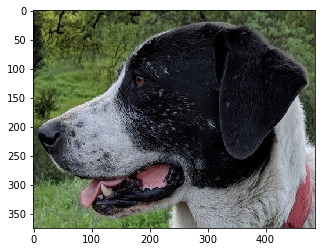

In [3]:
face= cv2.imread("../DATA/sammy_face.jpg")
face=cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [4]:
#EXAMPLE OF EVAL

In [5]:
myString='sum'

In [6]:
eval(myString)

<function sum(iterable, start=0, /)>

In [7]:
test=eval(myString)

In [8]:
#now test will behave as a sum function

In [9]:
test([1,2,4])

7

In [10]:
#cv2.matchTemplate()
#paramters: image, template, method

In [11]:
testing_method=cv2.matchTemplate(full,face,cv2.TM_CCOEFF)

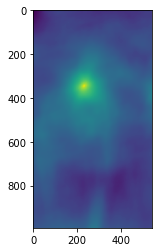

In [12]:
plt.imshow(testing_method)
#returns a heatmap for the point with maximum possibility of template present in 
# the image

In [13]:
test_min,test_max,test_min_loc,test_max_loc=cv2.minMaxLoc(testing_method)

In [14]:
test_min_loc # top_left point of image

(0, 10)

In [15]:
test_max_loc

(231, 345)

In [16]:
height,width,channels=face.shape

In [17]:
pt1=test_max_loc  #top_left
pt2=(test_max_loc[0]+width,test_max_loc[1]+height) #bottom right

In [18]:
cv2.rectangle(full,pt1,pt2,(0,255,0),8)

array([[[ 40,  44,  43],
        [ 31,  35,  34],
        [ 36,  40,  39],
        ...,
        [ 95, 103,  54],
        [ 64,  72,  23],
        [ 63,  67,  32]],

       [[ 41,  45,  44],
        [ 36,  40,  39],
        [ 34,  38,  37],
        ...,
        [ 82,  90,  43],
        [ 63,  71,  24],
        [ 68,  72,  37]],

       [[ 39,  43,  42],
        [ 48,  52,  51],
        [ 38,  42,  41],
        ...,
        [ 68,  75,  31],
        [ 63,  70,  28],
        [ 74,  78,  43]],

       ...,

       [[ 89,  97,  48],
        [ 94, 102,  55],
        [109, 117,  70],
        ...,
        [ 56,  64,  41],
        [ 68,  73,  51],
        [ 64,  68,  51]],

       [[ 87,  89,  65],
        [ 68,  70,  46],
        [ 73,  72,  51],
        ...,
        [ 47,  55,  34],
        [ 73,  78,  58],
        [ 73,  77,  60]],

       [[ 62,  58,  47],
        [ 57,  53,  42],
        [ 56,  52,  41],
        ...,
        [ 47,  51,  34],
        [ 78,  82,  65],
        [ 75,  79,  62]]

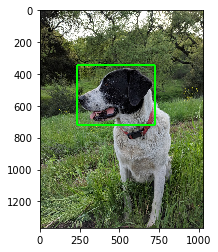

In [19]:
plt.imshow(full)

In [20]:
#Now getting output for all methods

# 

In [21]:
methods=['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


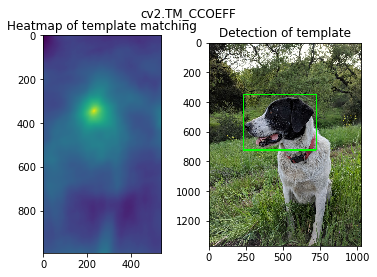

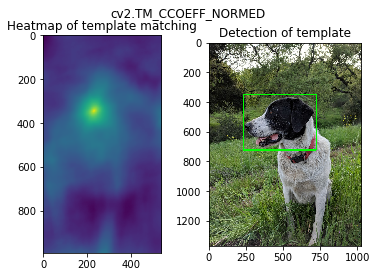

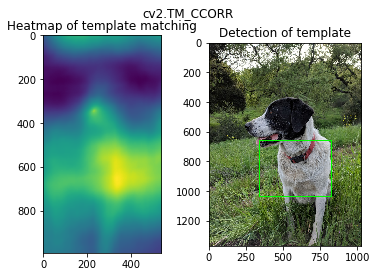

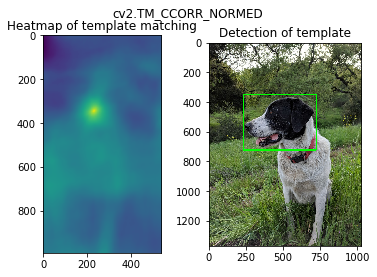

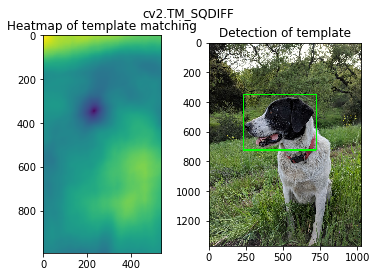

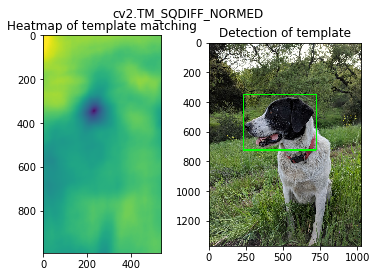

In [22]:
for m in methods:
    
    method=eval(m)
    full=full_img.copy()
    
    res=cv2.matchTemplate(full,face,method)
    
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
        
    height,width,channels=face.shape
    
    bottom_right=(top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full,top_left,bottom_right,(0,255,0),5)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap of template matching")
    
    plt.subplot(122)
    plt.imshow(full)
    plt.title("Detection of template")
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n \n')